## Read and plot a SWOT-HR Pixel Cloud and Pixel Cloud Vector netcdf products 
In this notebook, we show how to read the SWOT-HR pixel cloud, pixel cloud vector products with xarray and how to represent a variable on a map with cartopy.

### Libraries
Please note that apart from the libraries listed in the cell below, you need to install the h5netcdf library (conda install -c conda-forge h5netcdf). This will be used by th xarray.open_dataset function to read the netcdf files.

In [2]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read a SWOT-HR Pixel Cloud netcdf product

In [3]:
dir_swot = "/home/hysope2/Datas/SIMU_SWOT/SWOT_sample_data_products_v1.2"
file_swot_pxc = os.path.join(dir_swot, "L2_HR_PIXC", "SWOT_L2_HR_PIXC_001_042_078L_20220402T112209_20220402T112219_Dx0000_01.nc")
# read data with xarray, specifying a group in the netcdf structure
xr_pxc = xr.open_dataset(file_swot_pxc, group="pixel_cloud")
# remove undefined values based on variable of interest
xr_pxc = xr_pxc.where(~np.isnan(xr_pxc.height))

### 2. Read a SWOT-HR Pixel Cloud Vector netcdf product

In [4]:
dir_swot = "/home/hysope2/Datas/SIMU_SWOT/SWOT_sample_data_products_v1.2"
file_swot_pxcvec = os.path.join(dir_swot, "L2_HR_PIXCVec","SWOT_L2_HR_PIXCVec_001_042_078L_20220402T112209_20220402T112219_Dx0000_01.nc")
# read data with xarray
xr_pxcvec = xr.open_dataset(file_swot_pxcvec)#, decode_cf=False, engine='h5netcdf')
# remove undefined values based on variable of interest
xr_pxcvec = xr_pxcvec.where(~np.isnan(xr_pxcvec.height_vectorproc))

### 3. Plot data on maps with cartopy

Text(0.5, 1.0, 'Pixel Cloud Vector')

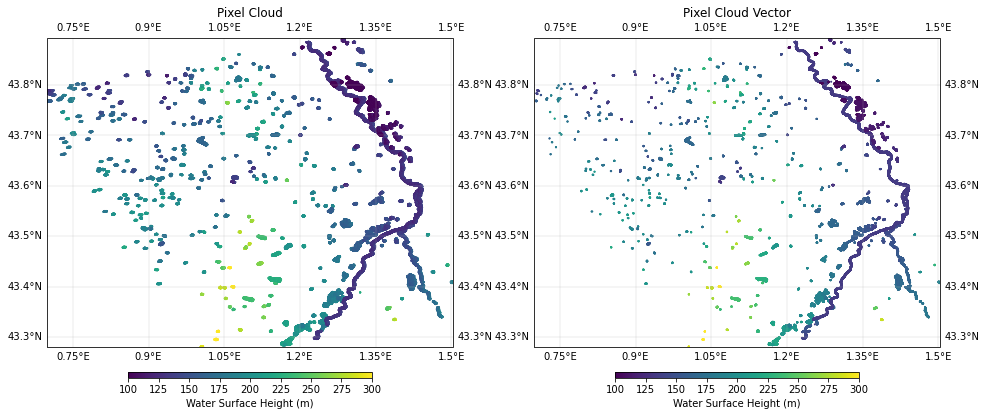

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


def customize_map(ax, cb, label, crs=ccrs.PlateCarree()):
    """This function customizes a map with projection and returns the plt.axes instance"""

    ax.gridlines(
        crs=crs,
        draw_labels=True,
        color='.7',
        alpha=.6,
        linewidth=.4,
        linestyle='-',
        )
    
    # add a background_map (default, local image, WMTS...read the doc)
    # ax.stock_img()

    # add a labeled colorbar
    plt.colorbar(
        cb,
        ax=ax,
        orientation='horizontal',
        shrink=0.6,
        pad=.05,
        aspect=40,
        label=label)

    return ax


# 0. Create Figure and Axes
crs = ccrs.PlateCarree()
fig, axs = plt.subplots(
    nrows=1,ncols=2,
    subplot_kw={'projection': crs},
    figsize=(16,9),
    frameon=True,
    )

# 1. Pixel Cloud Data
# plot data on the map with scatter function
cb0 = axs[0].scatter(
    x=xr_pxc.longitude,
    y=xr_pxc.latitude,
    c=xr_pxc.height,
    s=1,
    transform=crs,
    cmap='viridis',
    vmin=100,
    vmax=300,
    )
# Initiate a map with the function above for Pixel cloud
customize_map(axs[0], cb0, "Water Surface Height (m)")
# limit map boundaries based on actual data
axs[0].set_extent(
    [
        xr_pxc.longitude.min(),
        xr_pxc.longitude.max(),
        xr_pxc.latitude.min(),
        xr_pxc.latitude.max(),
    ], 
    crs=crs
    )
axs[0].set_title("Pixel Cloud")


# 2. Pixel Cloud Vector Data.
# plot data on the map with scatter function
cb1 = axs[1].scatter(
    x=xr_pxcvec.longitude_vectorproc,
    y=xr_pxcvec.latitude_vectorproc,
    c=xr_pxcvec.height_vectorproc,
    s=1,
    transform=crs,
    cmap='viridis',
    vmin=100,
    vmax=300,
    )
# Initiate a map with the function above for Pixel cloud
customize_map(axs[1], cb1, "Water Surface Height (m)")
# limit map boundaries based on actual data from reference dataset (for homogeneity)
axs[1].set_extent(
    axs[0].get_extent(),
    # [
        # xr_pxcvec.longitude_vectorproc.min(),
        # xr_pxcvec.longitude_vectorproc.max(),
        # xr_pxcvec.latitude_vectorproc.min(),
        # xr_pxcvec.latitude_vectorproc.max(),
    # ], 
    crs=crs
    )

axs[1].set_title("Pixel Cloud Vector")